In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load your dataset
df = pd.read_csv('survey_results_public.csv')


In [2]:
df

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,592,I agree,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 times a week,3-5 times a week,Never,15-30 minutes a day,Less than 15 minutes a day,DevOps function;Microservices;Automated testin...,Healthcare,Appropriate in length,Easy,107090.0
592,593,I agree,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Hobby;Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,2032.0
593,594,I agree,"I am not primarily a developer, but I write co...",18-24 years old,"Student, full-time",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Blogs with tips and tricks;Written-based Onlin...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
594,595,I agree,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",In-person,Bootstrapping a business;Freelance/contract wo...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...,...,3-5 times a 

In [3]:
print(df.columns)

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [4]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [5]:
df.tail()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
591,592,I agree,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 times a week,3-5 times a week,Never,15-30 minutes a day,Less than 15 minutes a day,DevOps function;Microservices;Automated testin...,Healthcare,Appropriate in length,Easy,107090.0
592,593,I agree,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Hobby;Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,2032.0
593,594,I agree,"I am not primarily a developer, but I write co...",18-24 years old,"Student, full-time",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Blogs with tips and tricks;Written-based Onlin...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN
594,595,I agree,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",In-person,Bootstrapping a business;Freelance/contract wo...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Formal documentation provided by the owner of ...,...,3-5 times a week,10+ times a week,3-5 times a week,60-120 minutes a day,15-30 minutes a day,AI-assisted technology tool(s),NaN,Too long,Neither easy nor difficult,NaN
595,596,I agree,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Contribute to open-source projects;Boots...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Colleague;Friend or family member;Hackathons (...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(596, 84)

In [7]:
print(df.isnull().sum()) #Finding Null Values

ResponseId               0
Q120                     0
MainBranch               0
Age                      0
Employment               4
                      ... 
ProfessionalTech       293
Industry               317
SurveyLength            13
SurveyEase               9
ConvertedCompYearly    273
Length: 84, dtype: int64


In [8]:
df.dtypes #data_types

ResponseId               int64
Q120                    object
MainBranch              object
Age                     object
Employment              object
                        ...   
ProfessionalTech        object
Industry                object
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
Length: 84, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           596 non-null    int64  
 1   Q120                                 596 non-null    object 
 2   MainBranch                           596 non-null    object 
 3   Age                                  596 non-null    object 
 4   Employment                           592 non-null    object 
 5   RemoteWork                           512 non-null    object 
 6   CodingActivities                     511 non-null    object 
 7   EdLevel                              593 non-null    object 
 8   LearnCode                            591 non-null    object 
 9   LearnCodeOnline                      462 non-null    object 
 10  LearnCodeCoursesCert                 231 non-null    object 
 11  YearsCode                       

C:\Users\MELDA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


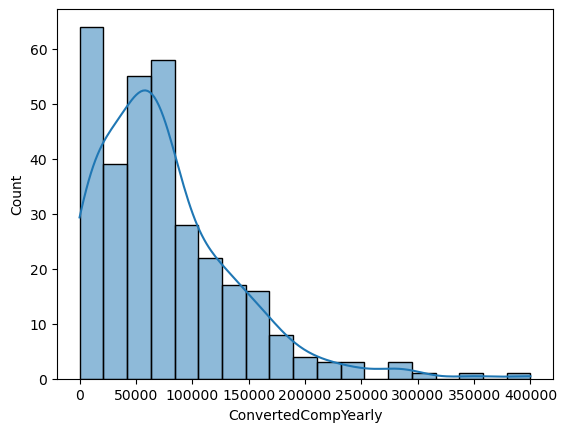

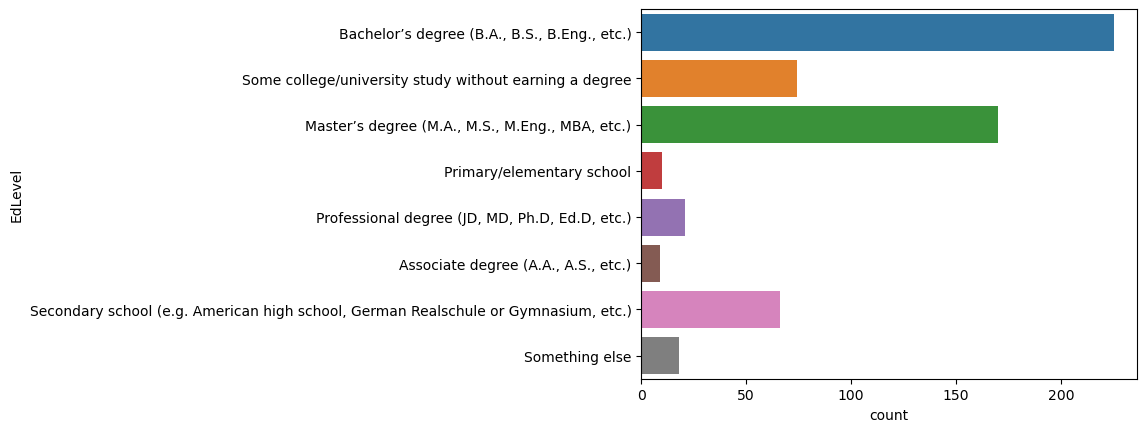

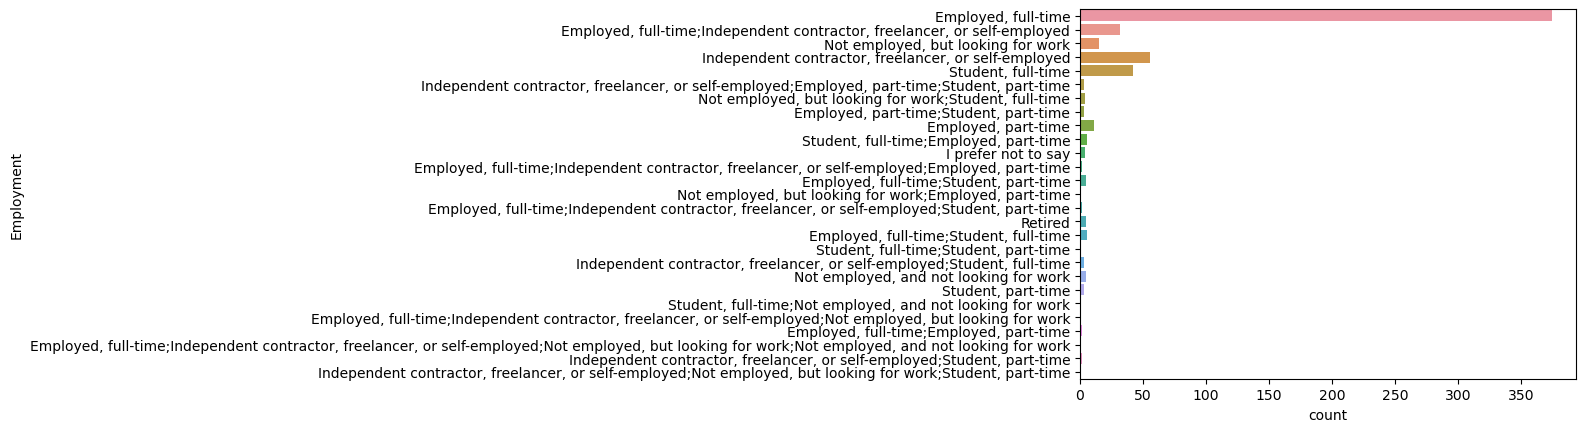

<Axes: xlabel='Age', ylabel='count'>

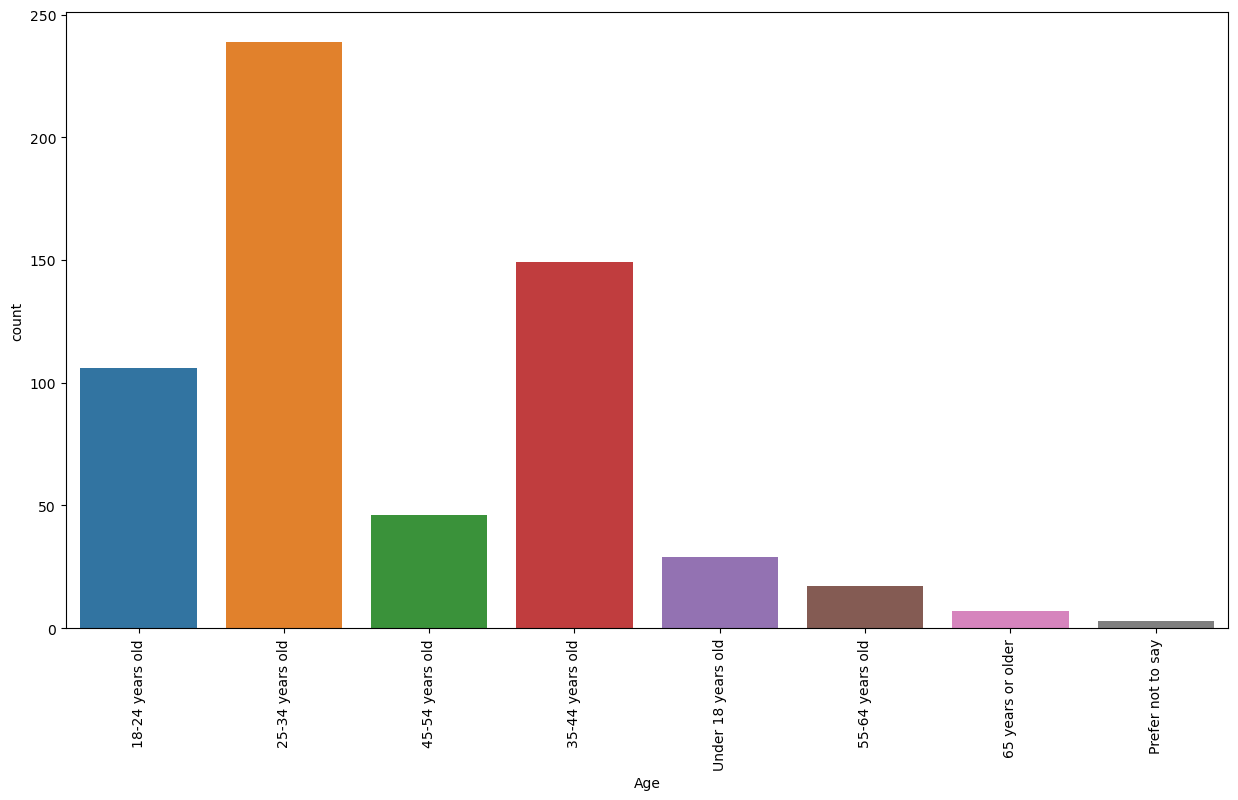

In [9]:
# Display basic information
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Visualize distributions
sns.histplot(df['ConvertedCompYearly'], kde=True)
plt.show()

sns.countplot(y='EdLevel', data=df)
plt.show()

sns.countplot(y='Employment', data=df)
plt.show()


plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x=df.Age)

## DATA CLEANING

In [10]:
import pandas as pd

# Sample data
data = {
    'Age': ['18-24 years old', '25-34 years old', '45-54 years old', '25-34 years old', None, '35-44 years old', '55-64 years old'],
    'LearnCode': ['Python', None, 'R', 'Python', 'Python', 'R', 'R']
}
df = pd.DataFrame(data)

# Step 1: Map age ranges to numeric values
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': None  # Optional: decide how to handle this
}

# Step 2: Convert age ranges to numeric values
df['Age_numeric'] = df['Age'].map(age_mapping)

# Step 3: Fill missing values with the median of the numeric values
df['Age_numeric'].fillna(df['Age_numeric'].median(), inplace=True)

# Step 4: Encode categorical variables (if needed)
df['LearnCode'].fillna(df['LearnCode'].mode()[0], inplace=True)

# Print the dataframe to check the results
print(df)



               Age LearnCode  Age_numeric
0  18-24 years old    Python          1.0
1  25-34 years old    Python          2.0
2  45-54 years old         R          4.0
3  25-34 years old    Python          2.0
4             None    Python          2.5
5  35-44 years old         R          3.0
6  55-64 years old         R          5.0


C:\Users\MELDA\AppData\Local\Temp\ipykernel_10808\3670999250.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age_numeric'].fillna(df['Age_numeric'].median(), inplace=True)
C:\Users\MELDA\AppData\Local\Temp\ipykernel_10808\3670999250.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

- The error occurs because the 'Age' column contains non-numeric values such as '18-24 years old', '25-34 years old', etc., and the median() function cannot be applied to these string values. To handle this, you need to first encode these age ranges into numeric values before filling the missing values.

- Mapping Age Ranges: The age_mapping dictionary assigns a numeric value to each age range.
- Converting to Numeric Values: The map() function is used to apply this mapping to the 'Age' column, creating a new column 'Age_numeric'.
- Filling Missing Values: The fillna() function fills any missing values in the 'Age_numeric' column with the median of the existing numeric values.
- Encoding Categorical Variables: The mode() function is used to fill missing values in the 'LearnCode' column with the most frequent value.

## SPLITTING DATA 

In [11]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

## TRAIN MODEL

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pickle

df = pd.read_csv('survey_results_public.csv')

# Print column names to verify
print(df.columns)

# Fill missing values for numerical columns with the median
for column in df.select_dtypes(include=['number']).columns:
    df[column].fillna(df[column].median(), inplace=True)

# Fill missing values for categorical columns with the mode
for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Check if 'ConvertedCompYearly' is in the DataFrame
if 'ConvertedCompYearly' in df.columns:
    # Split the data into features and target
    X = df.drop('ConvertedCompYearly', axis=1)
    y = df['ConvertedCompYearly']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

    # Save the model and label encoders
    with open('model.pkl', 'wb') as f:
        pickle.dump(model, f)

    with open('label_encoders.pkl', 'wb') as f:
        pickle.dump(label_encoders, f)
else:
    print("Column 'ConvertedCompYearly' not found in the DataFrame")




    

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

C:\Users\MELDA\AppData\Local\Temp\ipykernel_10808\1324546970.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\MELDA\AppData\Local\Temp\ipykernel_10808\1324546970.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Mean Absolute Error: 11934.067666666666


A MAE of approximately 1194 indicates the average error in your salary predictions. Depending on the context of the data, you might want to consider further steps to improve your model's performance.

In [14]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [15]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with the best parameters
best_model = RandomForestRegressor(
    max_depth=None,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)

# Train the model on your training data
best_model.fit(X_train, y_train)

# Evaluate the model
y_pred = best_model.predict(X_test)
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')


Mean Absolute Error: 11612.864650260066


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import numpy as np
import pickle

# Load the dataset
df = pd.read_csv('survey_results_public.csv')

# Check if the target column is in the dataframe

if 'ConvertedCompYearly' in df.columns
    # Remove rows where the target is NaN, infinity, or excessively large
    df = df[np.isfinite(df['ConvertedCompYearly']) & (df['ConvertedCompYearly'] < 1e7)]

    # Split the data into features and target
    X = df.drop('ConvertedCompYearly', axis=1)
    y = df['ConvertedCompYearly']

    # Identify numerical and categorical columns
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns

    # Preprocessing for numerical data
    
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Define the model
    model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Create and evaluate the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define hyperparameters to tune
    param_grid = {
        'model__n_estimators': [100, 300, 500],
        'model__max_depth': [3, 6, 9],
        'model__learning_rate': [0.01, 0.1, 0.3],
        'model__subsample': [0.7, 0.8, 0.9],
        'model__colsample_bytree': [0.7, 0.8, 0.9]
    }

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, error_score='raise')
    grid_search.fit(X_train, y_train)

    # Print best parameters
    print("Best Parameters:", grid_search.best_params_)

    # Evaluate the model with the best parameters
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

    # Save the model
    with open('best_model_xgb.pkl', 'wb') as f:
        pickle.dump(best_model, f)
else:
    print("Column 'ConvertedCompYearly' not found in the DataFrame")


Best Parameters: {'model__colsample_bytree': 0.9, 'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 300, 'model__subsample': 0.9}
Mean Absolute Error: 15249.361433293268
